# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
#!pip install citipy

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


602

In [4]:
#print(cities)

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

print(query_url)

http://api.openweathermap.org/data/2.5/weather?appid=0a3599b63ca5670ebfbce3120f3c23ce&units=Imperial&q=


In [6]:
lat = []
lng =[]
temp_max = []
humidity = []
wind_speed = []
country = []
date = []
ID = []
city_found = []
Cloudiness=[]
x=0
for city in cities:
    x=x+1
    response = requests.get(query_url + city).json()
    try:
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        temp_max.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        Cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        ID.append(response['id'])
        city_found.append(city)
      
    except:
          print(f"{x}.{city} not found. Skipping ...") 

15.saleaula not found. Skipping ...
22.mys shmidta not found. Skipping ...
31.barentsburg not found. Skipping ...
35.grand river south east not found. Skipping ...
55.nizhneyansk not found. Skipping ...
60.illoqqortoormiut not found. Skipping ...
67.zyryanovskiy not found. Skipping ...
97.aflu not found. Skipping ...
101.samusu not found. Skipping ...
103.grand centre not found. Skipping ...
131.bolungarvik not found. Skipping ...
149.taolanaro not found. Skipping ...
171.othonoi not found. Skipping ...
186.babanusah not found. Skipping ...
191.martfu not found. Skipping ...
201.palabuhanratu not found. Skipping ...
211.tiruvottiyur not found. Skipping ...
220.tabiauea not found. Skipping ...
235.mouzakion not found. Skipping ...
239.meyungs not found. Skipping ...
249.attawapiskat not found. Skipping ...
266.belushya guba not found. Skipping ...
283.tsihombe not found. Skipping ...
284.urdzhar not found. Skipping ...
292.novoye atlashevo not found. Skipping ...
314.sentyabrskiy not fo

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:

Weather_df=pd.DataFrame({'City':city_found
                         ,'Lat': lat
                         ,'Lng':lng
                         ,'Max Temp (F)':temp_max
                         ,'Humidity':humidity
                         ,'Cloudiness':Cloudiness
                         ,'Wind Speed': wind_speed
                         ,'Country':country
                         ,'Date':date})
Weather_df

,City,Lat,Lng,Max Temp (F),Humidity,Cloudiness,Wind Speed,Country,Date
0,flin flon,54.77,-101.86,55.40,66,20,5.82,CA,1590175860
1,georgetown,5.41,100.34,80.60,88,40,6.93,MY,1590175721
2,ushuaia,-54.80,-68.30,53.60,40,75,8.05,AR,1590175646
3,puerto ayora,-0.74,-90.35,84.20,62,20,16.11,EC,1590175860
4,hun,29.13,15.95,71.64,56,12,17.74,LY,1590175860
...,...,...,...,...,...,...,...,...,...
546,sangmelima,2.93,11.98,70.20,93,6,2.66,CM,1590175916
547,oxelosund,58.67,17.10,50.00,53,100,11.41,SE,1590175916
548,komsomolskoye,55.26,47.55,42.62,87,0,5.03,RU,1590175916
549,vanino,49.09,140.25,43.97,66,75,3.36,RU,1590175917


In [8]:
Weather_df.dtypes

City             object
Lat             float64
Lng             float64
Max Temp (F)    float64
Humidity          int64
Cloudiness        int64
Wind Speed      float64
Country          object
Date              int64
dtype: object

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
max_humidity=Weather_df['Humidity'].max()
print(max_humidity)


100


In [10]:
#skipping this step as no city has humidity >100

In [11]:
#  Get the indices of cities that have humidity over 100%.


In [12]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [13]:
# Extract relevant fields from the data frame
Weather_df.to_csv('output_cities.csv')


# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

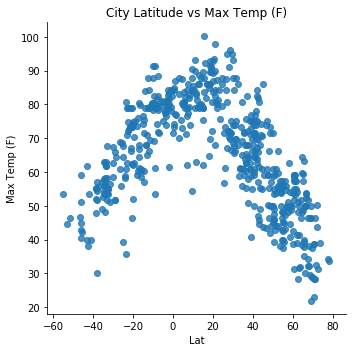

In [14]:
#create a function for scatter plot:
def scatter_plot(yaxis):
    sns.lmplot('Lat', yaxis, data=Weather_df, fit_reg=False)
    plt.title(f"City Latitude vs {yaxis}")
    plt.tight_layout()
    return
scatter_plot("Max Temp (F)")

## Latitude vs. Humidity Plot

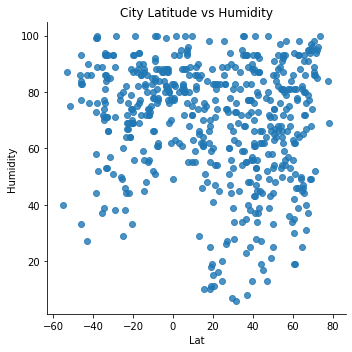

In [15]:
scatter_plot("Humidity")

## Latitude vs. Cloudiness Plot

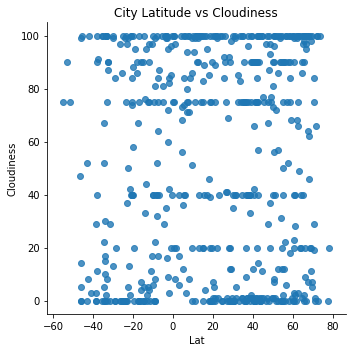

In [16]:
scatter_plot("Cloudiness")

## Latitude vs. Wind Speed Plot

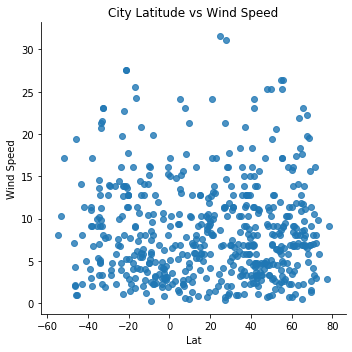

In [17]:
scatter_plot("Wind Speed")

## Linear Regression

In [18]:
from scipy import stats
# OPTIONAL: Create a function to create Linear Regression plots
def linear_reg_plot(xaxis,yaxis,df):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(df[xaxis], df[yaxis])
    regress_values = df[xaxis] * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    #tips = sns.load_dataset("tips")

    # get coeffs of linear fit
    slope, intercept, r_value, p_value, std_err = stats.linregress(df[xaxis],df[yaxis])

    # use line_kws to set line label for legend
    ax = sns.regplot(x=xaxis, y=yaxis, data=df, color='b', 
     line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})
    plt.title(f"The relationship between {xaxis} and {yaxis}")
    # plot legend
    ax.legend()

    plt.show()

    results = {} 
    coeffs = np.polyfit(df[xaxis], df[yaxis],1) 
    # Polynomial Coefficients 
    results['polynomial'] = coeffs.tolist() 
    correlation = np.corrcoef(df[xaxis], df[yaxis])[0,1] 
    # r-squared 
    r_squared = correlation**2 
    
    print(f'The r-squared is: {r_squared}')
    return 
    
    
#linear_reg_plot("Lat","Max Temp",northern_df)    

In [19]:
# Create Northern and Southern Hemisphere DataFrames
northern_df=Weather_df.loc[(Weather_df["Lat"] >=0)]
northern_df
southern_df=Weather_df.loc[(Weather_df["Lat"] <0)]
southern_df

,City,Lat,Lng,Max Temp (F),Humidity,Cloudiness,Wind Speed,Country,Date
2,ushuaia,-54.80,-68.30,53.60,40,75,8.05,AR,1590175646
3,puerto ayora,-0.74,-90.35,84.20,62,20,16.11,EC,1590175860
6,punta arenas,-53.15,-70.92,44.60,87,90,10.29,CL,1590175820
7,castro,-24.79,-50.01,67.77,80,100,9.95,BR,1590175737
8,kavieng,-2.57,150.80,82.80,77,60,6.33,PG,1590175861
...,...,...,...,...,...,...,...,...,...
524,port augusta,-32.50,137.77,53.60,93,87,8.05,AU,1590175914
529,rio branco,-9.97,-67.81,87.80,66,40,4.70,BR,1590175915
536,amparafaravola,-17.58,48.22,60.28,88,67,5.73,MG,1590175915
541,kokopo,-4.35,152.26,78.39,84,29,4.29,PG,1590175916


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

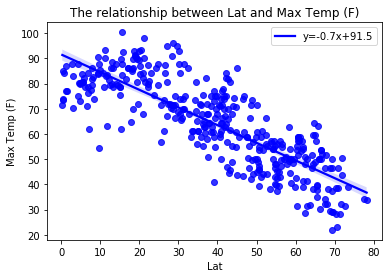

The r-squared is: 0.6693256884924589


In [20]:
linear_reg_plot("Lat","Max Temp (F)",northern_df)    

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

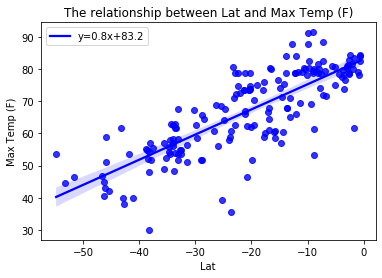

The r-squared is: 0.6374963749576062


In [21]:
# imports
#linear_reg_plot(southern_df["Max Temp"],southern_df["Lat"])
linear_reg_plot("Lat","Max Temp (F)",southern_df)    

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

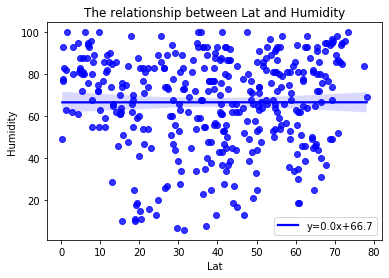

The r-squared is: 2.696889913603425e-07


In [22]:
linear_reg_plot("Lat","Humidity",northern_df)    

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

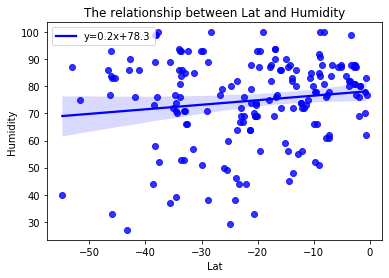

The r-squared is: 0.019605810983089767


In [23]:
linear_reg_plot("Lat","Humidity",southern_df)    

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

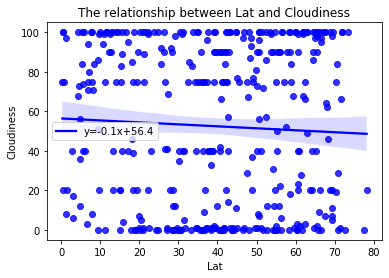

The r-squared is: 0.0024833585579323806


In [24]:
linear_reg_plot("Lat","Cloudiness",northern_df)    

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

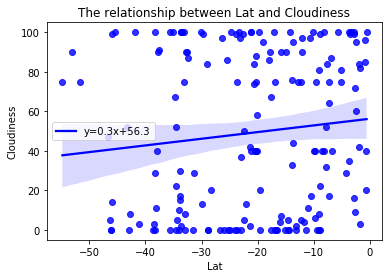

The r-squared is: 0.012661922307652602


In [25]:
linear_reg_plot("Lat","Cloudiness",southern_df)    

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

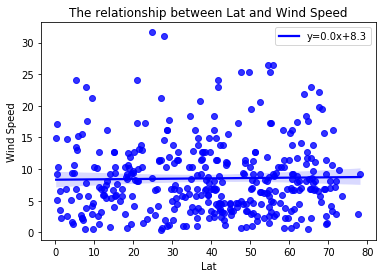

The r-squared is: 0.0003509257924497774


In [26]:
linear_reg_plot("Lat","Wind Speed",northern_df)    

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

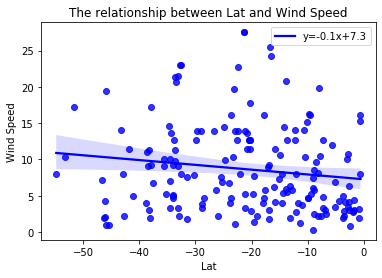

The r-squared is: 0.021267323860066766


In [27]:
linear_reg_plot("Lat","Wind Speed",southern_df)    